CLASSIFYING ART PIECES

In this project, I am working on classifying art pieces.  Art has been a part of our life for as long as humanity has existed. For thousands of years people have been creating, looking at, criticizing, and enjoying art. Art is something that captures the eye. Whether the artist is trying to communicate an emotion, an idea or something else, the most important thing is how well the audience receives it. Art is something that inspires people, something that transports us into different realities and moves us into the subconscious places that we did not know existed. 
There are many different types of art like animation, architecture, assemblage, calligraphy, ceramics, computer, Christian or religious, conceptual, artistic design, drawing, folk, graffiti, graphic, illuminated manuscript, illustration, mosaic, painting, performance, photography, sculpture, stained glass, tapestry, and video. Subclassifications include chalk, charcoal, pen and ink, watercolors, acrylics, miniature painting, engraving, lithography, screen printing, wood carving, dance, and acting.
Out of all, I have taken 5 different art forms to classify
1.	Paintings - Painting is the practice of applying paint, pigment, color or other medium to a solid surface (Wikipedia).
2.	Drawings - Drawing is a form of visual art in which a person uses various drawing instruments to mark paper or another two-dimensional medium (Wikipedia).
3.	Sculpture - Sculpture is the branch of the visual arts that operates in three dimensions. The earliest example of sculpture dates back to the Upper Paleolithic period (40,000 to 10,000 years ago) (Wikipedia).
4.	Engravings - Engraving is the practice of incising a design onto a hard, usually flat surface by cutting grooves into it with a burin (Wikipedia).
5.	Iconography (old Russian art): Iconography, as a branch of art history, studies the identification, description, and the interpretation of the content of images (Wikipedia).

 DATA EXPLORATION

In [1]:
import random
random.seed(128)

In [2]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [3]:
# Parameters
training_dataset_path = '/home/workspace/dataset/dataset_updated/training_set'
testing_dataset_path = '/home/workspace/dataset/dataset_updated/testing_set'

NUMBER OF CATEGORIES IN DATA

In [4]:
categories = ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']
print("labels of images are " ,categories )

labels of images are  ['drawings', 'engraving', 'iconography', 'painting', 'sculpture']


LOADING DATASETS

In [5]:
#function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    image_files = np.array(data['filenames'])
    image_targets = np.array(data['target'])
    return image_files, image_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset(training_dataset_path)
test_files, test_targets = load_dataset(testing_dataset_path)

IMAGES IN EACH TRAINING AND TESTING SETS

In [6]:
# printing statistics about the dataset
print('There are %d total image categories.' % len(categories))
print('There are %s total art images.\n' % len(np.hstack([train_files, test_files])))
print('There are %d training art images.' % len(train_files))
print('There are %d testing art images.'% len(test_files))

There are 5 total image categories.
There are 8577 total art images.

There are 7721 training art images.
There are 856 testing art images.


NUMBER OF IMAGES IN EACH CATEGORY IN TRAINING DATA 

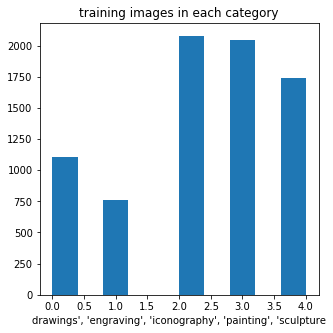

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.xlabel("drawings', 'engraving', 'iconography', 'painting', 'sculpture")
plt.title("training images in each category")
plt.hist(train_targets);
plt.savefig("images/train_images")

NUMBER OF IMAGES IN EACH CATEGORY IN TESTING DATA 

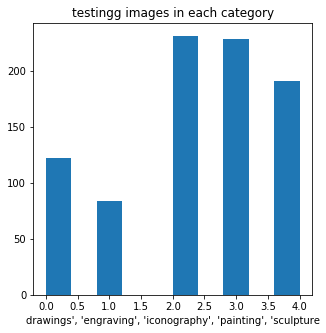

In [9]:
plt.figure(figsize = (5,5))
plt.xlabel("drawings', 'engraving', 'iconography', 'painting', 'sculpture")
plt.title("testingg images in each category")
plt.hist(test_targets);
plt.savefig("images/test_images")

IMAGES ARE TURNING INTO CATOGORICAL TYPES IN OREDER TO USE IN CNN ALGORITHS

In [10]:
train_targets_categorical = np_utils.to_categorical(train_targets, 5)
test_targets_categorical = np_utils.to_categorical(test_targets, 5)

TRYING TO RETRIVEE IMAGES IN TRAINING DATASET 

10 sample images in training dataset


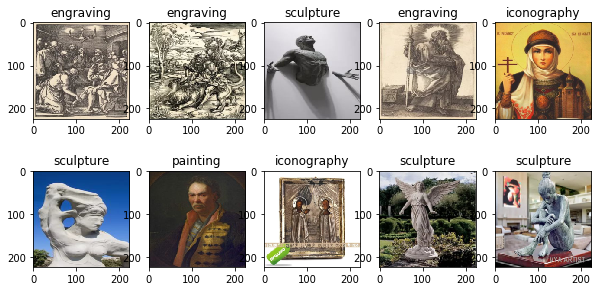

In [11]:
from keras.preprocessing import image
fig = plt.figure(figsize=(10,5))
print("10 sample images in training dataset")
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = image.load_img(train_files[i], target_size=(224, 224))
    plt.title(str(categories[train_targets[i]]))
    plt.imshow(img)
plt.savefig("images/training_sample_images")

TRYING TO RETRIVEE IMAGES IN TESTING DATASET 

10 sample images in test dataset


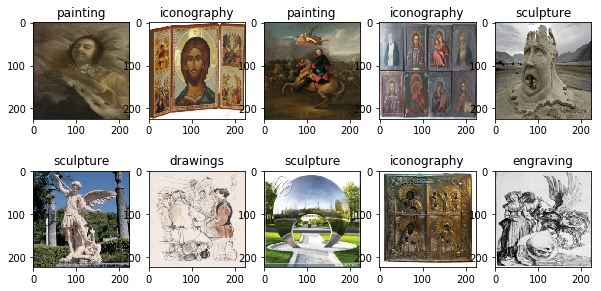

In [12]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
print("10 sample images in test dataset")
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = image.load_img(test_files[i], target_size=(224, 224))
    plt.title(str(categories[test_targets[i]]))
    plt.imshow(img)
plt.savefig("images/testing_sample_images")

PREPARING DATA

SPECIFIED IMAGE SPECIFICATION FOR EVALUTION , THIS IS MY INTITUTION ONLY

In [13]:
width = 224
height = 224
n_channels = 3

RETRIVING ALL IMAGES IN BOTH TRAINING AND TESTING DATAASETS AND RESIZING THEM FOR CNN

In [20]:
from keras.preprocessing import image                 
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(width, height))
    # converts PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # converts 3D tensor to 4D tensor with shape (1, 224, 224, 3) and returns 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

NORMALIZING ALL IMAGE DATA BY DIVIDING WITH 255(STANDARD CAPACITY FOR EACH IMAGE CELL

In [21]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 856/856 [00:08<00:00, 98.65it/s] 


SPLITTING TRAINING DATA INTO BOTH TRAINNING AND VALIDATION DATASETS

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(train_tensors , train_targets_categorical , test_size = 0.10 , random_state = 42)

I chose to use a version of the CNN architecture as my bench_model.

Conv2D layer with 16 nodes - with in input shape (224 , 224 ,3)
Max Pooling layer (aggregation layer)
flatten layer
Dense layers with 500 nodes and activation of "relu"
Dropout layer with 0.4 rate
Dense layers with 5 output nodes and activation of "softmax" layer

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

bench_model = Sequential()
bench_model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='elu', 
                        input_shape=(224, 224, 3)))
bench_model.add(MaxPooling2D(pool_size=2))
bench_model.add(Flatten())

bench_model.add(Dense(500, activation='relu'))
bench_model.add(Dropout(0.4))
bench_model.add(Dense(5, activation='softmax'))

bench_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 200704)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               100352500 
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 2505      
Total params: 100,355,213
Trainable params: 100,355,213
Non-trainable params: 0
______________________________________________________________

COMPILING THE BENCH MODEL

In [32]:
# compile the model
bench_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

TRYING TO FIT BENCH_MODEL AND ALSO SPECIFIED CHECK POINTER TO SAVE BEST WEIGHTS IN ORDER TO USE IN FUTURE

In [33]:
from keras.callbacks import ModelCheckpoint  
epochs = 10

checkpointer = ModelCheckpoint(filepath='weights.best.from_bench.hdf5', 
                               verbose=1, save_best_only=True)

bench_result = bench_model.fit(X_train, y_train, 
        validation_data=(X_valid, y_valid),
        epochs=epochs, batch_size=32, callbacks=[checkpointer], verbose=1)

Train on 6948 samples, validate on 773 samples
Epoch 1/10
6948/6948 [==============================] - 47s 7ms/step - loss: 11.8160 - acc: 0.2638 - val_loss: 12.0729 - val_acc: 0.2510
Epoch 2/10
6948/6948 [==============================] - 36s 5ms/step - loss: 11.7476 - acc: 0.2712 - val_loss: 12.0729 - val_acc: 0.2510
Epoch 3/10
6948/6948 [==============================] - 36s 5ms/step - loss: 11.7476 - acc: 0.2712 - val_loss: 12.0729 - val_acc: 0.2510
Epoch 4/10
6948/6948 [==============================] - 36s 5ms/step - loss: 11.7476 - acc: 0.2712 - val_loss: 12.0729 - val_acc: 0.2510
Epoch 5/10
6948/6948 [==============================] - 36s 5ms/step - loss: 11.7476 - acc: 0.2712 - val_loss: 12.0729 - val_acc: 0.2510
Epoch 6/10
6948/6948 [==============================] - 36s 5ms/step - loss: 11.7476 - acc: 0.2712 - val_loss: 12.0729 - val_acc: 0.2510
Epoch 7/10
6948/6948 [==============================] - 36s 5ms/step - loss: 11.7476 - acc: 0.2712 - val_loss: 12.0729 - val_acc: 0

LOADING BEST MODEL WEIGHTS FROM HDF5 FILE INTO BENCH MODEL

In [34]:
bench_model.load_weights('weights.best.from_bench.hdf5')

CHECKING THE ACCURACY OF BENCH_MODEL

In [35]:
# get index of predicted dog breed for each image in test set
predictions = [np.argmax(bench_model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets_categorical, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 26.9860%


MY FIRST CNN MODEL FOR ART CLASSIFICATION.

Description for final model
I chose to use a modified version of the Bench mark CNN architecture and add an additional layer while starting with 16 nodes in the first layer as stated with model.
1.	Conv2D layer with 16 nodes - I chose this layer to ideally try and find lines in the image.
2.	Max Pooling layer (aggregation layer)
3.	Conv2D layer with 32 nodes - I chose this layer to try and find some shapes in the art
4.	Max Pooling layer (aggregation layer)
5.	Conv2D layer with 64 nodes - I chose this layer to try and find some feature regarding the structure of the art.
6.	Max Pooling Layer (aggregation layer)
7.	Conv2D layer with 128 nodes - I chose this layer to try and hopefully get some good correlations in images.
8.	Max Pooling Layer (aggregation layer)
9.	Conv2D layer with 256 nodes - I chose this layer to try and hopefully get some good correlations in images.
10.	Max Pooling Layer (aggregation layer)
11.	Global Average Pooling 2D - Aggregates the previous layers.
12.	Sigmoid Output Layer for the 5 categories of images.

In [38]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=3, kernel_initializer='he_normal', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
bench_model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
bench_model.add(Dropout(0.3))

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='elu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
bench_model.add(Dropout(0.4))

model.add(GlobalAveragePooling2D())

model.add(Dense(5, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 111, 111, 16)      64        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 54, 54, 32)        128       
__________

COMPILING FIRST MODEL

In [39]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

TRAINING THE FIRST MODEL

In [40]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 20

### Do NOT modify the code below this line.
checkpointer = ModelCheckpoint(filepath='weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

cnn_result = model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          epochs=epochs, batch_size=128, callbacks=[checkpointer], verbose=1)

Train on 6948 samples, validate on 773 samples
Epoch 1/20
6948/6948 [==============================] - 36s 5ms/step - loss: 0.9726 - acc: 0.6770 - val_loss: 2.0216 - val_acc: 0.2911
Epoch 2/20
6948/6948 [==============================] - 30s 4ms/step - loss: 0.6927 - acc: 0.7519 - val_loss: 1.5049 - val_acc: 0.4592
Epoch 3/20
6948/6948 [==============================] - 30s 4ms/step - loss: 0.5919 - acc: 0.7855 - val_loss: 1.4062 - val_acc: 0.4580
Epoch 4/20
6948/6948 [==============================] - 30s 4ms/step - loss: 0.5310 - acc: 0.8100 - val_loss: 1.1753 - val_acc: 0.5796
Epoch 5/20
6948/6948 [==============================] - 30s 4ms/step - loss: 0.4874 - acc: 0.8227 - val_loss: 0.8523 - val_acc: 0.6921
Epoch 6/20
6948/6948 [==============================] - 30s 4ms/step - loss: 0.4636 - acc: 0.8319 - val_loss: 0.9309 - val_acc: 0.6740
Epoch 7/20
6948/6948 [==============================] - 30s 4ms/step - loss: 0.4218 - acc: 0.8466 - val_loss: 0.7062 - val_acc: 0.7490
Epoch 8/

LOADING BEST WEIGHTS FROM TRAINED CNN MODEL

In [41]:
model.load_weights('weights.best.from_scratch.hdf5')

CHECKING THE ACCURACY OF FIRST MODEL

In [42]:
# get index of predicted dog breed for each image in test set
predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(test_targets_categorical, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.9299%


MODEL2:IMPLEMENTING PRETRAINED ResNet50 MODEL AS MY MODEL2 

In [45]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

#number of classes in your dataset e.g. 20
num_classes = 5

x = Flatten()(base_model.output)
#4096
x = Dense(1024, activation='elu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

#create graph of your new model
ResNet_model = Model(input = base_model.input, output = predictions)

#compile the model
ResNet_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
### Training the model.
checkpointer = ModelCheckpoint(filepath='weights.best.ResNet50.hdf5', 
                               verbose=1, save_best_only=True)

ResNet_Result = ResNet_model.fit(X_train , y_train, 
          validation_data=(X_valid , y_valid),
          epochs=10, batch_size=32, callbacks=[checkpointer], verbose=1)

Train on 6948 samples, validate on 773 samples
Epoch 1/10
6948/6948 [==============================] - 259s 37ms/step - loss: 0.8605 - acc: 0.7346 - val_loss: 2.3958 - val_acc: 0.2484
Epoch 2/10
6948/6948 [==============================] - 242s 35ms/step - loss: 0.4933 - acc: 0.8283 - val_loss: 3.7728 - val_acc: 0.2251
Epoch 3/10
6948/6948 [==============================] - 241s 35ms/step - loss: 0.4169 - acc: 0.8566 - val_loss: 5.0890 - val_acc: 0.2717
Epoch 4/10
6948/6948 [==============================] - 242s 35ms/step - loss: 0.3665 - acc: 0.8702 - val_loss: 5.2146 - val_acc: 0.2561
Epoch 5/10
6948/6948 [==============================] - 243s 35ms/step - loss: 0.3178 - acc: 0.8876 - val_loss: 0.4121 - val_acc: 0.8564
Epoch 6/10
6948/6948 [==============================] - 242s 35ms/step - loss: 0.2758 - acc: 0.9050 - val_loss: 2.2280 - val_acc: 0.5369
Epoch 7/10
6948/6948 [==============================] - 242s 35ms/step - loss: 0.2413 - acc: 0.9135 - val_loss: 1.0803 - val_acc: 0

In [49]:
### Loads the model weights with the best validation loss.
ResNet_model.load_weights('weights.best.ResNet50.hdf5')

In [50]:
### Calculates classification accuracy on the test dataset.
ResNet_predictions = [np.argmax(ResNet_model.predict(np.expand_dims(feature, axis=0))) for feature in test_tensors]

# reports test accuracy
test_accuracy = 100*np.sum(np.array(ResNet_predictions)==np.argmax(test_targets_categorical, axis=1))/len(ResNet_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 85.5140%


classification report for CNN model1

In [65]:
from sklearn.metrics import classification_report
pred = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in test_tensors]
print(classification_report(test_targets, np.array(pred) ,target_names =categories ))

             precision    recall  f1-score   support

   drawings       0.67      0.54      0.60       122
  engraving       0.69      0.64      0.67        84
iconography       0.90      0.97      0.93       231
   painting       0.92      0.92      0.92       228
  sculpture       0.85      0.91      0.88       191

avg / total       0.84      0.85      0.84       856



classification report for ResNet50 model

In [66]:
pred = [np.argmax(ResNet_model.predict(np.expand_dims(feature, axis=0))) for feature in test_tensors]
print(classification_report(test_targets, np.array(pred) ,target_names =categories ))

             precision    recall  f1-score   support

   drawings       0.71      0.59      0.65       122
  engraving       0.89      0.58      0.71        84
iconography       0.95      0.93      0.94       231
   painting       0.85      0.96      0.90       228
  sculpture       0.82      0.93      0.87       191

avg / total       0.85      0.86      0.85       856



CNN_model plots for loss and accuracy with each epoch

In [78]:
fig = plt.figure(figsize=(5,5))
plt.plot(cnn_result.history['loss'], label="Loss")
plt.plot(cnn_result.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/cnn_results_loss");

In [79]:
fig = plt.figure(figsize=(5,5))
plt.plot(cnn_result.history['acc'], label="Accuracy")
plt.plot(cnn_result.history['val_acc'], label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("images/cnn_results_accuracy");

ResNet50 model plots for loss and accuracy with each epoch

In [81]:
fig = plt.figure(figsize=(5,5))
plt.plot(ResNet_Result.history['loss'], label="Loss")
plt.plot(ResNet_Result.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/ResNet_results_loss");

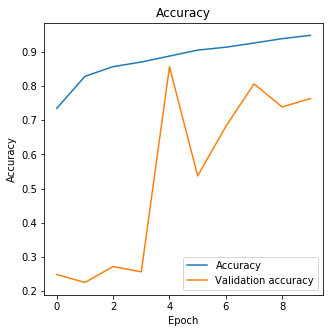

In [82]:
# Accuracy
fig = plt.figure(figsize=(5,5))
plt.plot(ResNet_Result.history['acc'], label="Accuracy")
plt.plot(ResNet_Result.history['val_acc'], label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("images/ResNet_results_Accuracy");

WORKING WITH REAL WORLD IMAGES

In [165]:
category_embeddings = {
    0 : 'drawings',
    1 : 'engraving',
    2 : 'iconography',
    3 : 'painting',
    4 : 'sculpture'
}

In [166]:
def predict(imgpath):
    img_read = path_to_tensor(imgpath)
    pred = np.argmax(model.predict(img_read))
    plt.imshow(plt.imread(imgpath))
    plot_title = "hey you look like " + str(category_embeddings[pred])
    plt.title(plot_title)
    plt.show();

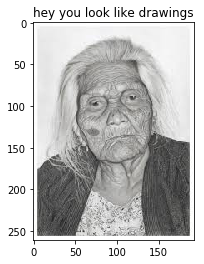

In [167]:
predict("upload/drawing.jpg")

In [168]:
predict("upload/engraving.jpg")

In [169]:
predict("upload/painting.jpg")